In [1]:
import os
from matplotlib import pyplot

In [2]:
train_dataset_path = '/home/pika/Downloads/GSR-Downloads/YOLOV4/datasetV4/train'

dataset_files = os.listdir(train_dataset_path)

annotations = list(filter(lambda file: 'txt' in file, dataset_files))

annotations = [train_dataset_path+'/'+filename for filename in annotations]

#List of Annotation Files
print(annotations[0:4])
print(len(annotations))


['/home/pika/Downloads/GSR-Downloads/YOLOV4/datasetV4/train/IMG515.txt', '/home/pika/Downloads/GSR-Downloads/YOLOV4/datasetV4/train/IMG84.txt', '/home/pika/Downloads/GSR-Downloads/YOLOV4/datasetV4/train/IMG60.txt', '/home/pika/Downloads/GSR-Downloads/YOLOV4/datasetV4/train/IMG394.txt']
427


In [3]:
space_names_path = '/home/pika/Downloads/GSR-Downloads/YOLOV4/space.names'

space_names_file = open(space_names_path, 'r')
chars = space_names_file.readlines()

char_index_map = dict()

i=0
for char in chars:
    char_index_map[i] = char.replace('\n', '')
    i+=1

print(char_index_map)

{0: 'A', 1: 'a', 2: 'B', 3: 'b', 4: 'C', 5: 'c', 6: 'D', 7: 'd', 8: 'E', 9: 'e', 10: 'F', 11: 'f', 12: 'G', 13: 'g', 14: 'H', 15: 'h', 16: 'I', 17: 'i', 18: 'J', 19: 'j', 20: 'K', 21: 'k', 22: 'L', 23: 'l', 24: 'M', 25: 'm', 26: 'N', 27: 'n', 28: 'O', 29: 'o', 30: 'P', 31: 'p', 32: 'Q', 33: 'q', 34: 'R', 35: 'r', 36: 'S', 37: 's', 38: 'T', 39: 't', 40: 'U', 41: 'u', 42: 'V', 43: 'v', 44: 'W', 45: 'w', 46: 'X', 47: 'x', 48: 'Y', 49: 'y', 50: 'Z', 51: 'z', 52: '0', 53: '1', 54: '2', 55: '3', 56: '4', 57: '5', 58: '6', 59: '7', 60: '8', 61: '9', 62: '!', 63: '"', 64: ',', 65: '#', 66: '$', 67: '%', 68: "'", 69: '*', 70: '+', 71: '-', 72: '.', 73: '/', 74: ':', 75: ';', 76: '=', 77: '?', 78: '@', 79: 'Space'}


In [4]:
from collections import Counter

counts = Counter()

for annotation_file in annotations:

    a_file = open(annotation_file)
    a_file_lines = a_file.readlines()
    index_list = []

    for line in a_file_lines:
        index_list.append(line.split(' ')[0])

    counts.update(index_list)

count_dict = dict(counts)

char_labels = [char_index_map[int(index)] for index in count_dict.keys()]
char_count = dict(zip(char_labels, count_dict.values()))

print(char_count)

{'B': 530, 'E': 570, '3': 540, '8': 562, 'Space': 7394, 'o': 2312, 'n': 2200, 't': 2676, 'h': 1410, 'e': 3387, 'v': 538, 'r': 1859, 'g': 856, 'i': 2225, 'm': 880, ',': 248, 'b': 618, 'p': 839, 's': 2069, 'j': 271, 'c': 1194, '.': 354, 'a': 2447, 'l': 1360, 'd': 1337, 'w': 688, '?': 33, 'u': 1070, 'H': 315, 'y': 709, 'I': 349, 'T': 397, '5': 315, '6': 308, 'P': 379, 'C': 377, '1': 334, 'V': 295, '7': 284, 'M': 328, '9': 285, 'f': 795, 'K': 296, 'X': 278, 'Z': 300, 'q': 293, 'A': 423, 'U': 294, 'L': 320, 'Q': 310, '/': 149, 'Y': 297, 'z': 280, 'R': 356, 'D': 361, 'x': 313, 'S': 404, '%': 122, '2': 327, '-': 217, 'O': 328, 'F': 322, '+': 144, '4': 291, '0': 282, 'k': 424, ':': 55, 'W': 285, 'G': 334, 'N': 350, 'J': 264, '"': 26, "'": 74, '@': 168, '#': 136, '$': 156, '!': 1, '*': 2}


In [5]:
import pandas as pd

df = pd.DataFrame(data=char_count, index=[0])

df = (df.T)

print (df)

df.to_csv('yolov4.csv')

          0
B       530
E       570
3       540
8       562
Space  7394
...     ...
@       168
#       136
$       156
!         1
*         2

[78 rows x 1 columns]


78 78


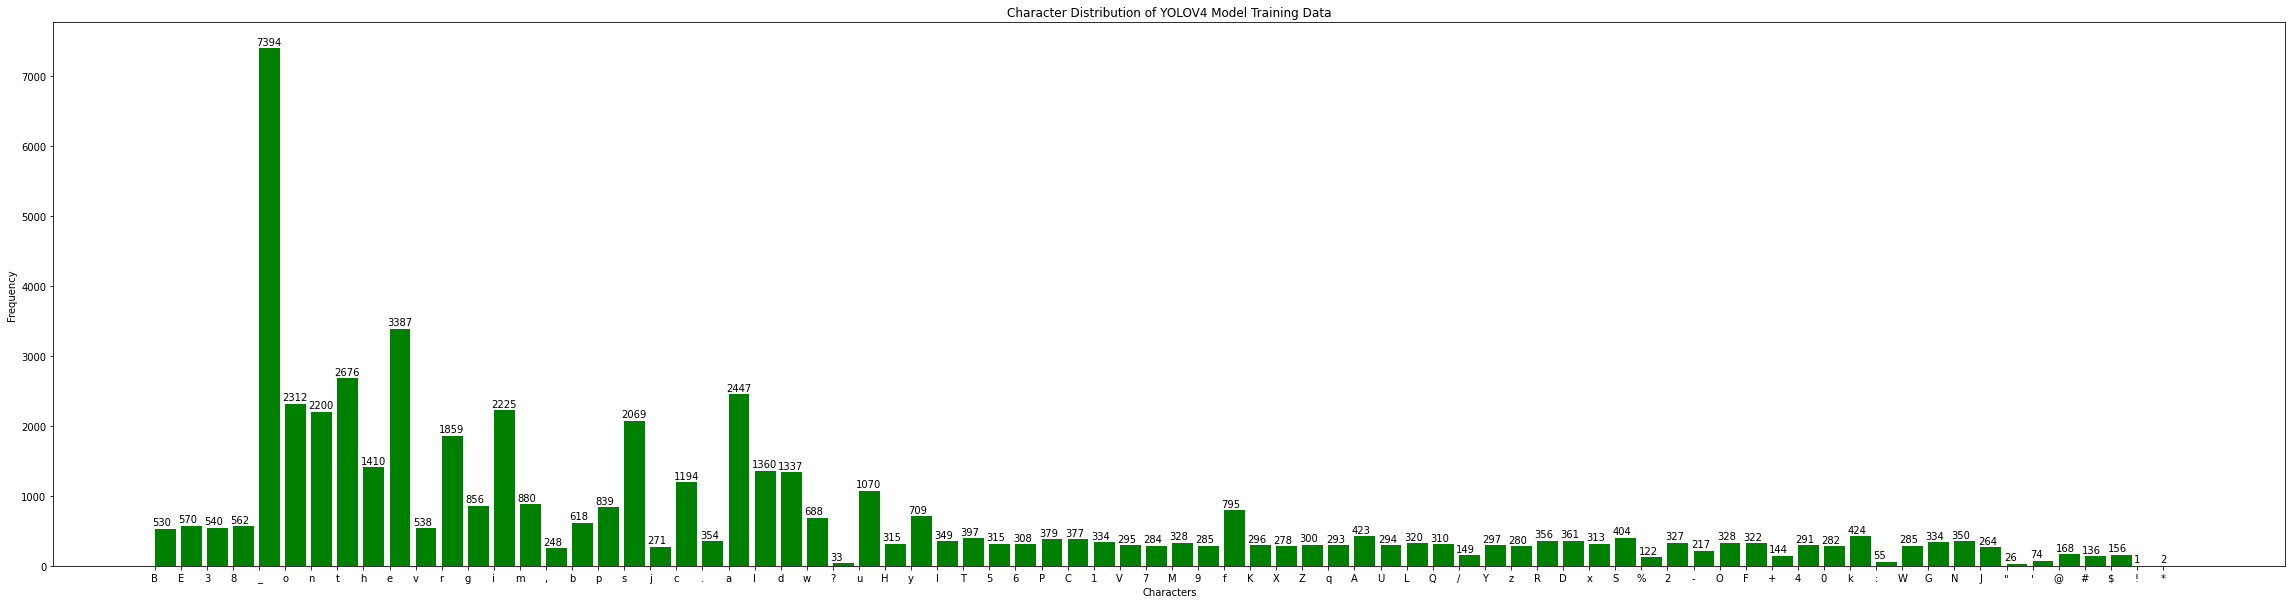

In [5]:
import numpy as np

x_labels = [char_index_map[int(index)] for index in count_dict.keys()]
y_points = list(count_dict.values())

space_index = x_labels.index('Space')
x_labels[space_index] = '_'
print(len(x_labels), len(y_points))

pyplot.figure(figsize=(40, 10))
pyplot.bar(x_labels, y_points, width=0.8, align='edge', color='g')

i=1.0
j=50
for i in range(len(x_labels)):
    pyplot.annotate(y_points[i], (-0.1 + i, y_points[i] + j))

pyplot.title("Character Distribution of YOLOV4 Model Training Data")
pyplot.xlabel("Characters")
pyplot.ylabel("Frequency")

pyplot.savefig('yolov4.png', facecolor='white')

pyplot.show()